In [120]:
import pandas as pd
import numpy as np
import os

# import libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# magic code for viewing plots using jupyter notebooks:
%matplotlib inline

Download the data

Pull in the data.   Create separate dataframes for the state by state data and the investor information.

In [142]:
# set the base directory
os.chdir('/home/jovyan/data-512/data-512-final/data-512-final')

# read the data
df_inv = pd.read_csv('raw_data/NFCS_2018_Investor_Data_191107.csv')
df_sbs = pd.read_csv('raw_data/NFCS_2018_State_Data_190603.csv')

In [102]:
df_sbs['C1_2012']

0         1
1         1
2         1
3        98
4         1
         ..
27086     1
27087     2
27088     2
27089     1
27090    98
Name: C1_2012, Length: 27091, dtype: int64

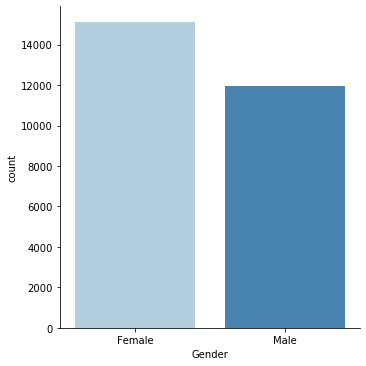

In [143]:
# create a nicer column for gender
df_sbs['Gender'] = df_sbs['A3'].apply(lambda x: 'Male' if x == 1 else 'Female')

# plot the gender distribution
sns.catplot(x="Gender", 
            kind="count", 
            data=df_sbs,
            palette=("Blues"))

Text(0.5, 0.98, 'Do you hold an investment account?')

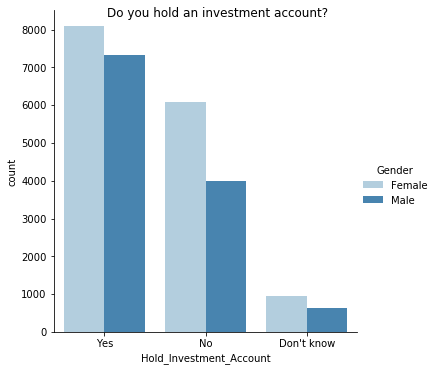

In [154]:
# who has access to an investment account

# create a clean column with labels
def investment_accounts(score):
    if score == 1:
        return 'Yes'
    elif score == 2:
        return 'No'
    else:
        return "Don't know"
        
df_sbs['Hold_Investment_Account'] = df_sbs.apply(lambda x: investment_accounts(x['C1_2012']),axis=1)

# plot the gender distribution
g3 = sns.catplot(x="Hold_Investment_Account", 
            kind="count",
            hue='Gender',
            data=df_sbs,
            order=["Yes", "No", "Don't know"],
            palette=("Blues"))
g3.fig.suptitle('Do you hold an investment account?') # can also get the figure from plt.gcf()

In [206]:
# what percentage of female respondents hold investment accounts?
df_sbs[(df_sbs['Gender'] =='Female')][['Gender','Hold_Investment_Account']].value_counts(normalize=True)

Gender  Hold_Investment_Account
Female  Yes                        0.535117
        No                         0.401321
        Don't know                 0.063561
dtype: float64

In [210]:
# what percentage of male respondents hold investment accounts?
df_sbs[(df_sbs['Gender'] =='Male')][['Gender','Hold_Investment_Account']].value_counts(normalize=True)

Gender  Hold_Investment_Account
Male    Yes                        0.612412
        No                         0.334142
        Don't know                 0.053446
dtype: float64

In [190]:
df2.groupby(by=["Gender"], dropna=True).NFCSID.sum()

Gender
Female    15135
Male      11956
Name: NFCSID, dtype: int64

In [160]:
data_per = df_sbs.groupby('Gender').agg(percentage =('Hold_Investment_Account', lambda p: p.count() / df_sbs.count() * 100)).round(2)

ValueError: Must produce aggregated value

In [ ]:
#Seaborn barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=data_per.index, y='percentage', data=data_per, ci=None, palette="muted",orient='v', )
ax.set_title("Pie chart approximation in Seaborn - Total Tip by Delivery Type", fontsize=15)
ax.set_xlabel ("Delivery Type")
ax.set_ylabel ("Percentage")
# calculate the percentages
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )
bar.savefig("Seaborn_Pie_Chart.png");

We see more females than male in the initial survey.  Let's see some of their responses to determine differing opinions.

Text(0.5, 0.98, 'Discussing My Finances Makes Me Feel Stressed')

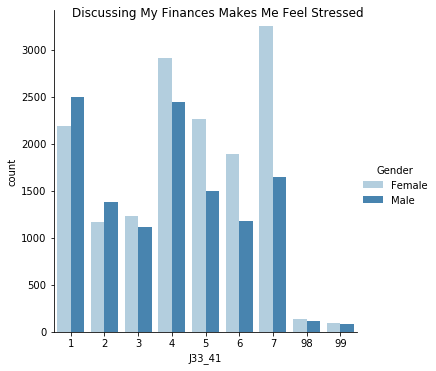

In [94]:
# plot the gender distribution
g = sns.catplot(x="J33_41", 
            kind="count",
            hue='Gender',
            data=df_sbs,
            #title="Discussing my finances can make me feel stressed",
            palette=("Blues"))
#plt.subplots_adjust(top=0.9)
g.fig.suptitle('Discussing My Finances Makes Me Feel Stressed') # can also get the figure from plt.gcf()

Text(0.5, 0.98, 'Discussing My Finances Makes Me Feel Stressed')

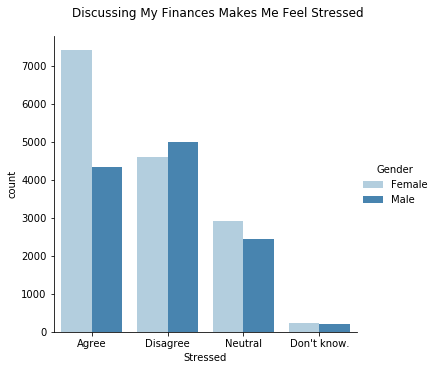

In [105]:
# now plot the gender dist again:

# create a clean column with labels
def financial_stress(score):
    if score <= 3:
        return 'Disagree'
    elif score == 4:
        return 'Neutral'
    elif score <= 7:
        return "Agree"
    else:
        return "Don't know."
        
df_sbs['Stressed'] = df_sbs.apply(lambda x: financial_stress(x['J33_41']),axis=1)

# plot the gender distribution
g2 = sns.catplot(x="Stressed", 
            kind="count",
            hue='Gender',
            data=df_sbs,
            palette=("Blues"))
g2.fig.suptitle('Discussing My Finances Makes Me Feel Stressed') # can also get the figure from plt.gcf()

In [144]:
# create a clean column with labels
def who_owns_account(gender, owner):
    if  gender == 'Female' and owner in(1,3):
        return 'Woman Owns Account'
    else:
        return 'Partner/Spouse Owns Account'
        
df_sbs['Account_Owner'] = df_sbs.apply(lambda x: who_owns_account(x['Gender'], xx['C2_2012']),axis=1)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


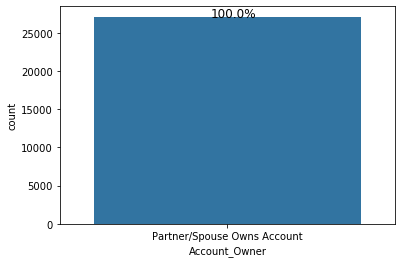

In [146]:
ax=sns.countplot('Account_Owner', data=df_sbs)

without_hue(ax, df_sbs.Account_Owner)

In [ ]:
sns.barplot(x='group', y='Values', data=df, estimator=lambda x: sum(x==0)*100.0/len(x))

In [ ]:
df_sbs['Gender']

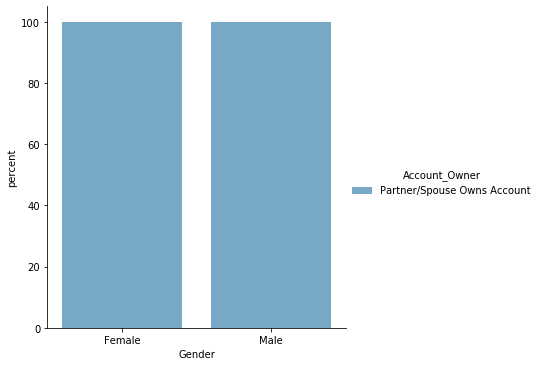

In [148]:
x,y = 'Gender', 'Account_Owner'

(df_sbs
.groupby(['Gender'])['Account_Owner']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='percent', hue=y,kind='bar', palette="Blues"))


Text(0.5, 0.98, 'Owner of Investment accounts')

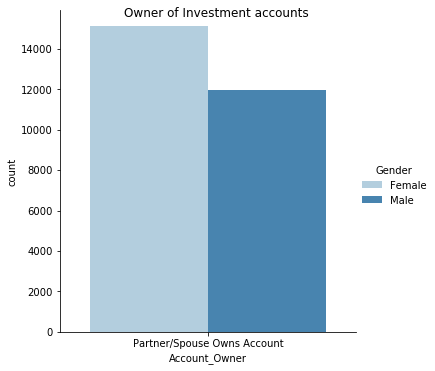

In [112]:
# plot the gender distribution
g3 = sns.catplot(x="Account_Owner", 
            kind="count",
            hue='Gender',
            data=df_sbs,
            palette=("Blues"))
g3.fig.suptitle('Owner of Investment accounts') # can also get the figure from plt.gcf()

In [106]:
df_sbs['C2_2012']

0         
1        1
2        2
3         
4        1
        ..
27086    2
27087     
27088     
27089     
27090     
Name: C2_2012, Length: 27091, dtype: object

---

In [98]:
# preview the results
df_sbs.head()

,NFCSID,STATEQ,CENSUSDIV,CENSUSREG,A3,A3Ar_w,A3B,A4A_new_w,A5_2015,A6,...,M7,M8,M31,M9,M10,wgt_n2,wgt_d2,wgt_s3,Gender,Stressed
0,2018010001,48,9,4,2,5,11,1,5,4,...,3,98,98,98,1,0.683683,0.519642,1.095189,Female,Agree
1,2018010002,10,5,3,2,2,8,1,6,1,...,3,98,3,1,98,0.808358,2.516841,0.922693,Female,Agree
2,2018010003,44,7,3,2,2,8,1,6,1,...,1,98,98,1,98,1.021551,1.896192,0.671093,Female,Agree
3,2018010004,10,5,3,2,1,7,1,6,2,...,98,4,4,2,98,0.808358,2.516841,0.922693,Female,Agree
4,2018010005,13,8,4,1,2,2,1,6,1,...,3,98,2,1,98,0.448075,0.614733,1.232221,Male,Disagree


Define "participation" in the following ways:

* Primary decision maker (otherwise, they may just coincidentally have accounts) 
  A1 = 1 OR 2
* Hold investments in retirement accounts (e.g., 401(k), IRA, etc.)
A2

In [ ]:
# lets define participation as holding a retirement investment account or a private investment account


In [6]:
# visuals

# import libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# magic code for viewing plots using jupyter notebooks:
%matplotlib inline

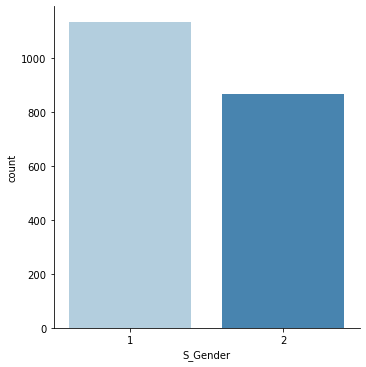

In [7]:
# plot the gender distribution
sns.catplot(x="S_Gender", 
            kind="count", 
            data=df_inv,
           # order=["none", "some", "hs", "bachelors", "professional", "masters", "doctorate"],
            palette=("Blues"))

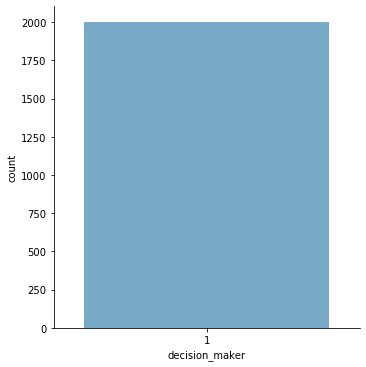

In [30]:
# let's see if women participate in investments less!
# plot the gender distribution
sns.catplot(x="decision_maker", 
            kind="count",
            #hue='S_Gender',
            data=df_inv,
           # order=["none", "some", "hs", "bachelors", "professional", "masters", "doctorate"],
            palette=("Blues"))

In [41]:
df_inv.loc[~df_inv['A2'].isin([1,2])]

,NFCSID,A1,A2,A3,B2_1,B2_2,B2_3,B2_4,B2_5,B2_7,...,G12,G13,H2,H3,WGT1,S_Gender,S_Age,S_Ethnicity,S_Education,S_Income
120,2018010893,2,98,1,1,2,1,2,1,2,...,1,4,2,1,0.910655,1,3,1,1,2
176,2018011542,1,99,1,1,2,2,2,1,2,...,2,3,1,1,1.493158,1,2,1,1,1
328,2018013910,1,99,1,1,1,2,1,2,2,...,3,3,2,1,0.874877,1,2,2,2,1
521,2018015469,1,98,1,1,1,1,1,98,2,...,2,98,1,1,0.609443,2,3,1,2,2
920,2018019270,2,98,1,2,2,1,2,2,2,...,1,2,1,1,1.493158,1,2,1,1,3
1045,2018020539,2,98,1,1,1,1,98,1,98,...,98,1,2,1,0.910655,1,3,1,1,1
1316,2018023745,2,99,1,2,2,1,2,2,2,...,1,3,1,1,0.910655,2,3,1,1,2
1624,2018026758,1,98,1,1,1,98,98,1,2,...,98,98,2,2,0.910655,1,3,1,1,3
1815,2018029454,1,98,1,2,1,1,1,2,2,...,1,2,2,1,0.874877,1,2,1,2,3
1919,2018030727,1,99,1,1,2,2,2,2,2,...,1,98,1,1,0.910655,2,3,1,1,1


In [28]:
# create new column to identify decision makers
df_inv['decision_maker'] = 0
df_inv.loc[df_inv['A1'].~isin([1,2]),'decision_maker']=1


In [32]:
df_inv.loc[df_inv['decision_maker']==0]

,NFCSID,A1,A2,A3,B2_1,B2_2,B2_3,B2_4,B2_5,B2_7,...,H3,WGT1,S_Gender,S_Age,S_Ethnicity,S_Education,S_Income,particpant,participant,decision_maker


In [22]:
# we see slightly more men than women in the survey.

# let's create a new column to identify participants
df_inv.loc[df_inv['A1'].isin([1,2]) & 
           ((df_inv['A2']==1) | (df_inv['A3']==1)),
           'participant']=1

In [44]:
df_inv.loc[df_inv['A1'].isin([1,2]) & ((df_inv['A2']==1) | (df_inv['A3']==1)) ].head(10)

,NFCSID,A1,A2,A3,B2_1,B2_2,B2_3,B2_4,B2_5,B2_7,...,G12,G13,H2,H3,WGT1,S_Gender,S_Age,S_Ethnicity,S_Education,S_Income
0,2018010042,2,1,1,98,98,1,1,98,2,...,3,4,1,2,0.910655,2,3,1,1,2
1,2018010047,1,1,1,1,1,1,1,1,2,...,2,2,1,1,1.566608,1,1,2,2,2
2,2018010050,2,1,1,1,1,2,2,2,2,...,98,98,1,2,0.609443,2,3,1,2,2
3,2018010051,1,1,1,2,2,1,2,1,2,...,1,4,1,2,0.609443,1,3,1,2,2
4,2018010053,1,1,1,1,1,1,1,2,1,...,3,4,1,1,0.609443,1,3,1,2,3
5,2018010054,2,1,1,1,2,1,2,1,2,...,98,98,1,2,0.609443,2,3,1,2,3
6,2018010066,1,1,1,2,2,1,2,2,2,...,98,98,1,1,0.609443,2,3,1,2,2
7,2018010078,1,1,1,2,2,1,2,2,2,...,1,3,1,1,0.910655,2,3,1,1,1
8,2018010082,1,1,1,1,2,1,2,2,2,...,98,3,1,1,0.609443,2,3,1,2,2
9,2018010094,2,1,1,2,2,1,2,1,2,...,2,99,1,1,0.609443,1,3,1,2,3


In [ ]:
# plot education distribution
sns.catplot(y="education", 
            kind="count", 
            data=toxicity_worker_demographics,
            order=["none", "some", "hs", "bachelors", "professional", "masters", "doctorate"],
            palette=("Blues"))

# plot gender dist
sns.catplot(x="gender", 
            kind="count", 
            data=toxicity_worker_demographics,
            palette=("Blues"))

# plot age group dist
sns.catplot(x="age_group", 
            kind="count", 
            data=toxicity_worker_demographics,
            order=["Under 18", "18-30", "30-45", "45-60", "Over 60"],
            palette=("Blues"))

# plot language dist
sns.catplot(x="english_first_language", 
            kind="count", 
            data=toxicity_worker_demographics,
            palette=("Blues"))

plt.tight_layout()

In [ ]:
# join the labels and comments
toxicity_annotated_comments['labeled_toxic'] = toxicity_labels

In [ ]:
# preview the results
toxicity_annotated_comments.loc[toxicity_annotated_comments['labeled_toxic'] == True].head(10)

In [ ]:
# join demographics to annotations
joined_toxicity_demographics = toxicity_annotations.join(toxicity_worker_demographics, on="worker_id", rsuffix="_r")

In [ ]:
# calculate average toxicity per user
avg_worker_toxicity = joined_toxicity_demographics.groupby("worker_id")["toxicity_score"].mean()

# join the average toxicity to the demographics table
toxicity_worker_demographics = toxicity_worker_demographics.join( avg_worker_toxicity )

# preview the results
toxicity_worker_demographics.head()

In [ ]:
# create barplot, specify the order
sns.barplot(y="education", 
                 x="toxicity_score", 
                 data=toxicity_worker_demographics, 
                 order=["none", "some", "hs", "bachelors", "professional", "masters", "doctorate"],
                 palette=("Blues"))

# save results for README file
fig = sns_plot.get_figure()
fig.savefig('output.png')